# Monte Carlo Simulation

## Simulation for GBP(Sterling) vs USD (Dollar)

In [69]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

In [70]:
# ticker symbol GBP vs USD
ticker_symbol = "GBPUSD=X"  
ticker = yf.Ticker(ticker_symbol)
historical_data = ticker.history(period="2y") 

In [71]:
df = historical_data
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-05-25,1.415689,1.421040,1.411771,1.415609,0,0,0
2021-05-26,1.414327,1.417635,1.411931,1.414387,0,0,0
2021-05-27,1.411313,1.419487,1.409225,1.411612,0,0,0
2021-05-28,1.420354,1.420656,1.413707,1.420374,0,0,0
2021-05-31,1.418239,1.421686,1.416591,1.418037,0,0,0


In [72]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-05-19,1.241311,1.247863,1.239388,1.241234,0,0,0
2023-05-22,1.246121,1.247256,1.241496,1.246106,0,0,0
2023-05-23,1.243595,1.244694,1.237333,1.243441,0,0,0
2023-05-24,1.241850,1.246417,1.235804,1.241727,0,0,0
2023-05-25,1.236583,1.238758,1.230966,1.231527,0,0,0


In [73]:
# drop variables
variables_to_drop = ["Volume", "Dividends", "Stock Splits"]
df = df.drop(variables_to_drop, axis=1)

In [74]:
df.head()

,Open,High,Low,Close
Date,,,,
2021-05-25,1.415689,1.421040,1.411771,1.415609
2021-05-26,1.414327,1.417635,1.411931,1.414387
2021-05-27,1.411313,1.419487,1.409225,1.411612
2021-05-28,1.420354,1.420656,1.413707,1.420374
2021-05-31,1.418239,1.421686,1.416591,1.418037


In [75]:
# Percentages of missing values if there is any
df.isna().sum().sort_values(ascending=False)

Open     0
High     0
Low      0
Close    0
dtype: int64

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 523 entries, 2021-05-25 to 2023-05-25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    523 non-null    float64
 1   High    523 non-null    float64
 2   Low     523 non-null    float64
 3   Close   523 non-null    float64
dtypes: float64(4)
memory usage: 20.4 KB


In [77]:
df.describe()

,Open,High,Low,Close
count,523.000000,523.000000,523.000000,523.000000
mean,1.275809,1.280570,1.270385,1.275796
std,0.084317,0.082938,0.085679,0.084327
min,1.072846,1.083541,1.037904,1.072754
25%,1.210127,1.214698,1.204950,1.210046
50%,1.253966,1.258131,1.247988,1.254029
75%,1.357055,1.360711,1.353153,1.357027
max,1.422758,1.424725,1.416591,1.422678


In [78]:
# low standard deviation indicates that there is low variability around the mean of the data (1.27)

In [79]:
# Check the current index
print(df.index)

DatetimeIndex(['2021-05-25', '2021-05-26', '2021-05-27', '2021-05-28',
               '2021-05-31', '2021-06-01', '2021-06-02', '2021-06-03',
               '2021-06-04', '2021-06-07',
               ...
               '2023-05-12', '2023-05-15', '2023-05-16', '2023-05-17',
               '2023-05-18', '2023-05-19', '2023-05-22', '2023-05-23',
               '2023-05-24', '2023-05-25'],
              dtype='datetime64[ns]', name='Date', length=523, freq=None)


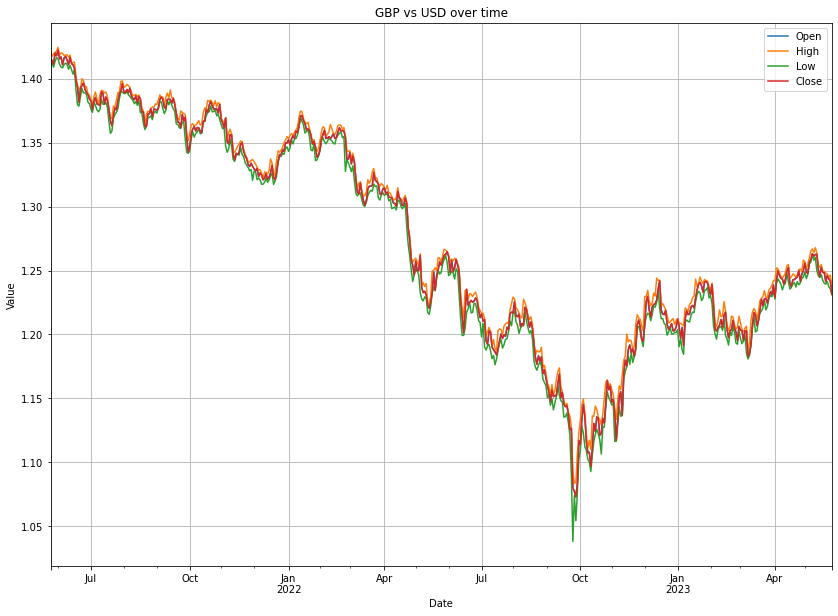

In [80]:
# Plot the line chart
df.plot(kind='line', y=['Open', 'High', 'Low', 'Close'], figsize=(14, 10))
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('GBP vs USD over time')
plt.legend(loc='upper right')
plt.grid(True)

# Filter and add data points for every 5 years
filtered_data = df[df.index.month % 12 == 0]

plt.show()

## Start the simulation

In [81]:
# Calculate the log variation
df['variation'] = np.log(df['Close'] / df['Close'].shift(-1))

# Drop the last row since it will have a missing value
df = df.iloc[:-1]

In [82]:
df.head()

,Open,High,Low,Close,variation
Date,,,,,
2021-05-25,1.415689,1.421040,1.411771,1.415609,0.000863
2021-05-26,1.414327,1.417635,1.411931,1.414387,0.001964
2021-05-27,1.411313,1.419487,1.409225,1.411612,-0.006188
2021-05-28,1.420354,1.420656,1.413707,1.420374,0.001646
2021-05-31,1.418239,1.421686,1.416591,1.418037,-0.003267


In [87]:
# Copy the 'Closed' column to 'new_price'
df['new_price'] = df['Close']

# Calculate the exponential of the smallest value in the 'Close' column for each row
exp_smallest = np.exp(np.min(df['Close']))

# Generate random numbers between 1 and 521
random_numbers = np.random.randint(1, 521, size=len(df))

# Apply the formula to calculate 'new_price' for each row
df['new_price'] *= np.exp(np.sort(df['Close'])[random_numbers - 1] - np.log(exp_smallest))

print(df)

                Open      High       Low     Close  variation  new_price
Date                                                                    
2021-05-25  1.415689  1.421040  1.411771  1.415609   0.000863   1.830895
2021-05-26  1.414327  1.417635  1.411931  1.414387   0.001964   1.898087
2021-05-27  1.411313  1.419487  1.409225  1.411612  -0.006188   1.598319
2021-05-28  1.420354  1.420656  1.413707  1.420374   0.001646   1.659700
2021-05-31  1.418239  1.421686  1.416591  1.418037  -0.003267   1.785574
...              ...       ...       ...       ...        ...        ...
2023-05-18  1.248253  1.249375  1.240064  1.248281   0.005661   1.482880
2023-05-19  1.241311  1.247863  1.239388  1.241234  -0.003918   1.428539
2023-05-22  1.246121  1.247256  1.241496  1.246106   0.002141   1.704367
2023-05-23  1.243595  1.244694  1.237333  1.243441   0.001379   1.404687
2023-05-24  1.241850  1.246417  1.235804  1.241727   0.008248   1.442025

[522 rows x 6 columns]


C:\Users\andre\AppData\Local\Temp\ipykernel_24924\1222997928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_price'] = df['Close']
C:\Users\andre\AppData\Local\Temp\ipykernel_24924\1222997928.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_price'] *= np.exp(np.sort(df['Close'])[random_numbers - 1] - np.log(exp_smallest))


In [88]:
# Copy the 'Closed' column to 'new_price'
df['new_price_1'] = df['Close']

# Calculate the exponential of the smallest value in the 'Close' column for each row
exp_smallest = np.exp(np.min(df['Close']))

# Generate random numbers between 1 and 521
random_numbers = np.random.randint(1, 521, size=len(df))

# Apply the formula to calculate 'new_price' for each row
df['new_price_1'] *= np.exp(np.sort(df['Close'])[random_numbers - 1] - np.log(exp_smallest))

print(df)

                Open      High       Low     Close  variation  new_price  \
Date                                                                       
2021-05-25  1.415689  1.421040  1.411771  1.415609   0.000863   1.830895   
2021-05-26  1.414327  1.417635  1.411931  1.414387   0.001964   1.898087   
2021-05-27  1.411313  1.419487  1.409225  1.411612  -0.006188   1.598319   
2021-05-28  1.420354  1.420656  1.413707  1.420374   0.001646   1.659700   
2021-05-31  1.418239  1.421686  1.416591  1.418037  -0.003267   1.785574   
...              ...       ...       ...       ...        ...        ...   
2023-05-18  1.248253  1.249375  1.240064  1.248281   0.005661   1.482880   
2023-05-19  1.241311  1.247863  1.239388  1.241234  -0.003918   1.428539   
2023-05-22  1.246121  1.247256  1.241496  1.246106   0.002141   1.704367   
2023-05-23  1.243595  1.244694  1.237333  1.243441   0.001379   1.404687   
2023-05-24  1.241850  1.246417  1.235804  1.241727   0.008248   1.442025   

           

C:\Users\andre\AppData\Local\Temp\ipykernel_24924\3771057417.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_price_1'] = df['Close']
C:\Users\andre\AppData\Local\Temp\ipykernel_24924\3771057417.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_price_1'] *= np.exp(np.sort(df['Close'])[random_numbers - 1] - np.log(exp_smallest))


In [89]:
# Copy the 'Closed' column to 'new_price'
df['new_price_2'] = df['Close']

# Calculate the exponential of the smallest value in the 'Close' column for each row
exp_smallest = np.exp(np.min(df['Close']))

# Generate random numbers between 1 and 521
random_numbers = np.random.randint(1, 521, size=len(df))

# Apply the formula to calculate 'new_price' for each row
df['new_price_2'] *= np.exp(np.sort(df['Close'])[random_numbers - 1] - np.log(exp_smallest))

print(df)

                Open      High       Low     Close  variation  new_price  \
Date                                                                       
2021-05-25  1.415689  1.421040  1.411771  1.415609   0.000863   1.830895   
2021-05-26  1.414327  1.417635  1.411931  1.414387   0.001964   1.898087   
2021-05-27  1.411313  1.419487  1.409225  1.411612  -0.006188   1.598319   
2021-05-28  1.420354  1.420656  1.413707  1.420374   0.001646   1.659700   
2021-05-31  1.418239  1.421686  1.416591  1.418037  -0.003267   1.785574   
...              ...       ...       ...       ...        ...        ...   
2023-05-18  1.248253  1.249375  1.240064  1.248281   0.005661   1.482880   
2023-05-19  1.241311  1.247863  1.239388  1.241234  -0.003918   1.428539   
2023-05-22  1.246121  1.247256  1.241496  1.246106   0.002141   1.704367   
2023-05-23  1.243595  1.244694  1.237333  1.243441   0.001379   1.404687   
2023-05-24  1.241850  1.246417  1.235804  1.241727   0.008248   1.442025   

           

C:\Users\andre\AppData\Local\Temp\ipykernel_24924\1312339861.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_price_2'] = df['Close']
C:\Users\andre\AppData\Local\Temp\ipykernel_24924\1312339861.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_price_2'] *= np.exp(np.sort(df['Close'])[random_numbers - 1] - np.log(exp_smallest))


In [90]:
# Copy the 'Closed' column to 'new_price'
df['new_price_3'] = df['Close']

# Calculate the exponential of the smallest value in the 'Close' column for each row
exp_smallest = np.exp(np.min(df['Close']))

# Generate random numbers between 1 and 521
random_numbers = np.random.randint(1, 521, size=len(df))

# Apply the formula to calculate 'new_price' for each row
df['new_price_3'] *= np.exp(np.sort(df['Close'])[random_numbers - 1] - np.log(exp_smallest))

print(df)

                Open      High       Low     Close  variation  new_price  \
Date                                                                       
2021-05-25  1.415689  1.421040  1.411771  1.415609   0.000863   1.830895   
2021-05-26  1.414327  1.417635  1.411931  1.414387   0.001964   1.898087   
2021-05-27  1.411313  1.419487  1.409225  1.411612  -0.006188   1.598319   
2021-05-28  1.420354  1.420656  1.413707  1.420374   0.001646   1.659700   
2021-05-31  1.418239  1.421686  1.416591  1.418037  -0.003267   1.785574   
...              ...       ...       ...       ...        ...        ...   
2023-05-18  1.248253  1.249375  1.240064  1.248281   0.005661   1.482880   
2023-05-19  1.241311  1.247863  1.239388  1.241234  -0.003918   1.428539   
2023-05-22  1.246121  1.247256  1.241496  1.246106   0.002141   1.704367   
2023-05-23  1.243595  1.244694  1.237333  1.243441   0.001379   1.404687   
2023-05-24  1.241850  1.246417  1.235804  1.241727   0.008248   1.442025   

           

C:\Users\andre\AppData\Local\Temp\ipykernel_24924\2266541628.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_price_3'] = df['Close']
C:\Users\andre\AppData\Local\Temp\ipykernel_24924\2266541628.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_price_3'] *= np.exp(np.sort(df['Close'])[random_numbers - 1] - np.log(exp_smallest))


In [91]:
# Copy the 'Closed' column to 'new_price'
df['new_price_4'] = df['Close']

# Calculate the exponential of the smallest value in the 'Close' column for each row
exp_smallest = np.exp(np.min(df['Close']))

# Generate random numbers between 1 and 521
random_numbers = np.random.randint(1, 521, size=len(df))

# Apply the formula to calculate 'new_price' for each row
df['new_price_4'] *= np.exp(np.sort(df['Close'])[random_numbers - 1] - np.log(exp_smallest))

print(df)

                Open      High       Low     Close  variation  new_price  \
Date                                                                       
2021-05-25  1.415689  1.421040  1.411771  1.415609   0.000863   1.830895   
2021-05-26  1.414327  1.417635  1.411931  1.414387   0.001964   1.898087   
2021-05-27  1.411313  1.419487  1.409225  1.411612  -0.006188   1.598319   
2021-05-28  1.420354  1.420656  1.413707  1.420374   0.001646   1.659700   
2021-05-31  1.418239  1.421686  1.416591  1.418037  -0.003267   1.785574   
...              ...       ...       ...       ...        ...        ...   
2023-05-18  1.248253  1.249375  1.240064  1.248281   0.005661   1.482880   
2023-05-19  1.241311  1.247863  1.239388  1.241234  -0.003918   1.428539   
2023-05-22  1.246121  1.247256  1.241496  1.246106   0.002141   1.704367   
2023-05-23  1.243595  1.244694  1.237333  1.243441   0.001379   1.404687   
2023-05-24  1.241850  1.246417  1.235804  1.241727   0.008248   1.442025   

           

C:\Users\andre\AppData\Local\Temp\ipykernel_24924\881012012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_price_4'] = df['Close']
C:\Users\andre\AppData\Local\Temp\ipykernel_24924\881012012.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['new_price_4'] *= np.exp(np.sort(df['Close'])[random_numbers - 1] - np.log(exp_smallest))


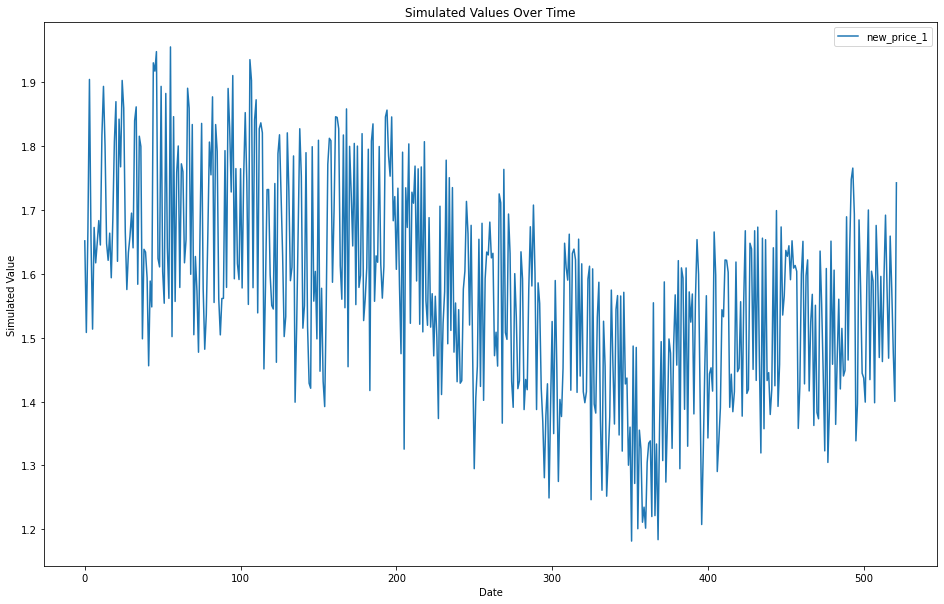

In [102]:
# Define the columns containing the simulated values
simulated_columns = ['new_price_1']

# Get the number of observations
num_observations = len(df.index)

# Plot the simulated values
plt.figure(figsize=(16, 10))  # Adjust the figure size as desired
for column in simulated_columns:
    plt.plot(range(num_observations), df[column], label=column)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Simulated Value')
plt.title('Simulated Values Over Time')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [ ]:
# Define the columns containing the simulated values
simulated_columns = ['new_price_2']

# Get the number of observations
num_observations = len(df.index)

# Plot the simulated values
plt.figure(figsize=(16, 10))  # Adjust the figure size as desired
for column in simulated_columns:
    plt.plot(range(num_observations), df[column], color='red', label=column)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Simulated Value')
plt.title('Simulated Values Over Time')

# Add a legend
plt.legend()

# Show the plot
plt.show()

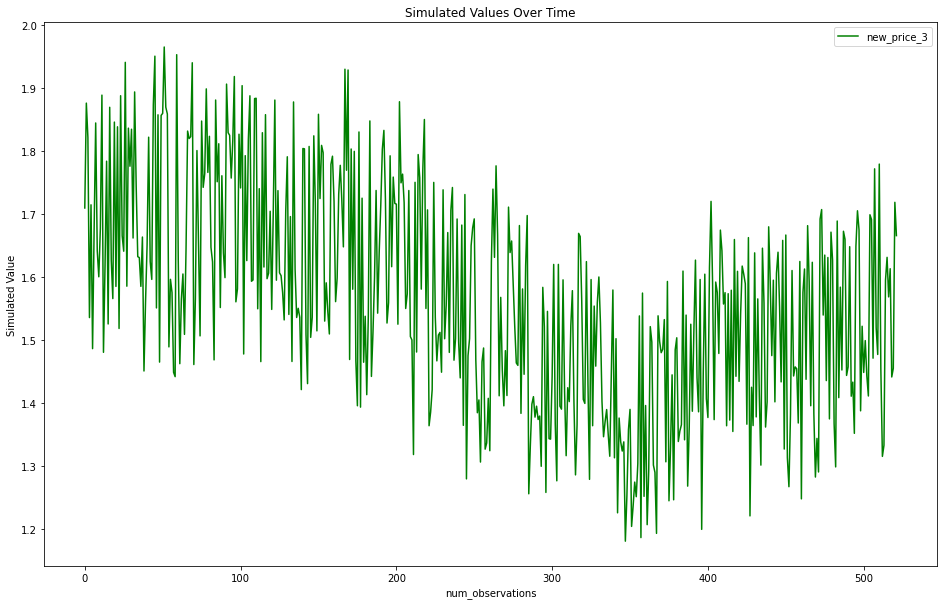

In [100]:
# Define the columns containing the simulated values
simulated_columns = ['new_price_3']

# Get the number of observations
num_observations = len(df.index)

# Plot the simulated values
plt.figure(figsize=(16, 10))  # Adjust the figure size as desired
for column in simulated_columns:
    plt.plot(range(num_observations), df[column], color='green', label=column)

# Add labels and title
plt.xlabel('num_observations')
plt.ylabel('Simulated Value')
plt.title('Simulated Values Over Time')

# Add a legend
plt.legend()

# Show the plot
plt.show()

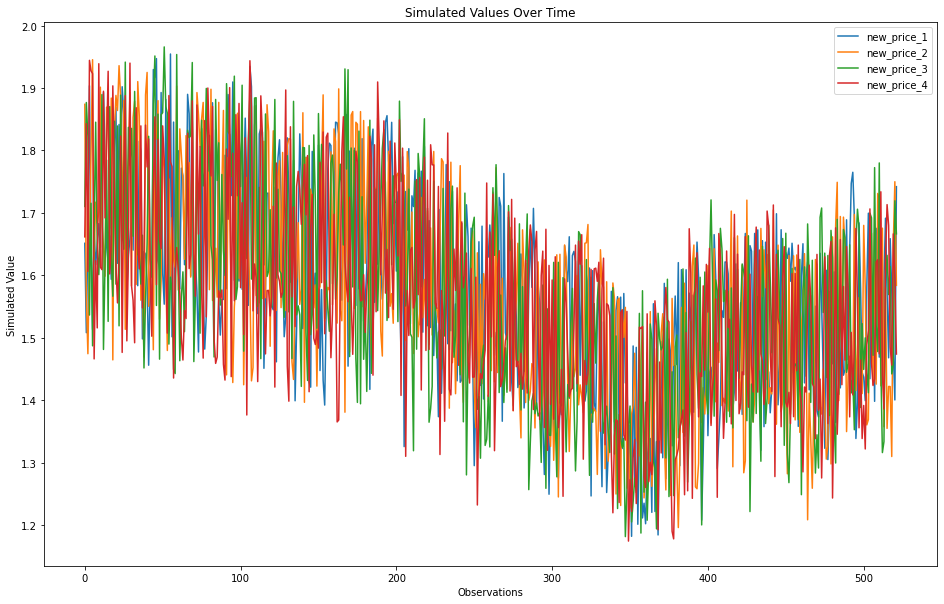

In [98]:
# Define the columns containing the simulated values
simulated_columns = ['new_price_1','new_price_2','new_price_3','new_price_4']

# Get the number of observations
num_observations = len(df.index)

# Plot the simulated values with red line
plt.figure(figsize=(16, 10))  # Adjust the figure size as desired
for column in simulated_columns:
    plt.plot(range(num_observations), df[column], label=column)

# Set x-label as the number of observations
plt.xlabel('Observations')

# Add other labels and title
plt.ylabel('Simulated Value')
plt.title('Simulated Values Over Time')

# Add a legend
plt.legend()

# Show the plot
plt.show()

The graphs above show the possible future variation of the GBP vs USD

Here's a summary of the steps you followed:

Generate random numbers from a normal distribution using np.random.normal().
Calculate the exponential of the smallest value in the 'variation' column using np.min() and np.exp().
Create a new column called 'new_price' by multiplying the 'Close' column with the exponential value.
Iterate over the remaining rows and calculate the 'new_price' by multiplying the previous day's 'new_price' with the exponential of the current day's 'variation'.
Plot the simulated values using matplotlib.